# Number of words in a sentence
Based on preprocessed data from AphasiaBank for Broca

In [29]:
import re

import pandas as pd
data = pd.read_csv("../../preprocessing/data/preprocessed_broca.csv")
data.dropna(inplace=True)

In [30]:
# check if all are broca patients
broca_fname = list(pd.read_csv("../../preprocessing/data/broca_fname.csv"))
data["source_file"].unique().sort() == broca_fname.sort()

True

In [31]:
# excluding punctuation, length of strings
lens = [len(x.split()) for x in data['preprocessed_text']]

In [32]:
df = pd.DataFrame(data={"length of sentence": lens})
df.to_csv("lens.csv", sep=',',index=False)

In [33]:
from collections import Counter
counter = Counter(lens)
total_sents = len(lens)
for item, count in counter.items():
    counter[item] = (counter[item]/total_sents) * 100

print(sorted(counter.items()))

[(1, 28.757225433526013), (2, 18.556227009984237), (3, 16.296636889122436), (4, 10.614818707304256), (5, 7.271413557540725), (6, 5.281135049921177), (7, 3.593011035207567), (8, 2.594587493431424), (9, 1.9771413557540725), (10, 1.3728323699421965), (11, 0.8670520231213872), (12, 0.7619548081975828), (13, 0.5714661061481872), (14, 0.3809774040987914), (15, 0.35470310036784025), (16, 0.20362585391487126), (17, 0.1445086705202312), (18, 0.17735155018392013), (19, 0.06568575932737783), (20, 0.0394114555964267), (21, 0.04598003152916448), (22, 0.013137151865475564), (23, 0.01970572779821335), (24, 0.006568575932737782), (26, 0.006568575932737782), (27, 0.013137151865475564), (32, 0.006568575932737782), (47, 0.006568575932737782)]


In [34]:
sum(Counter(lens).values())
len(data["preprocessed_text"])

15224

In [35]:
print(sum(counter.values()))

99.99999999999997


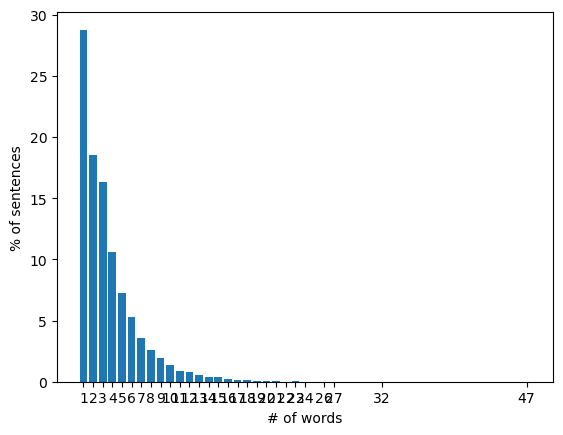

In [36]:
from matplotlib import pyplot as plt
plt.bar(counter.keys(), counter.values())
plt.xticks(list(counter.keys()))
plt.ylabel("% of sentences")
plt.xlabel("# of words")
plt.plot()
plt.show()

# EVAL output (from CLAN)

In [37]:
import pandas as pd 

In [38]:
# averages from database (no comparion eval CLAN output
df = pd.read_csv("../clan_outputs/eval_output.csv")

In [39]:
df.columns

Index(['File', 'Language', 'Corpus', 'Code', 'Age', 'Sex', 'Group', 'Race',
       'SES', 'Role', 'Education', 'Custom_field', 'Duration_(sec)',
       'Total_Utts', 'MLU_Utts', 'MLU_Words', 'MLU_Morphemes', 'FREQ_types',
       'FREQ_tokens', 'FREQ_TTR', 'Words_Min', 'Verbs_Utt', '%_Word_Errors',
       'Utt_Errors', 'density', '%_Nouns', '%_Plurals', '%_Verbs', '%_Aux',
       '%_Mod', '%_3S', '%_13S', '%_PAST', '%_PASTP', '%_PRESP', '%_prep',
       '%_adj', '%_adv', '%_conj', '%_det', '%_pro', 'noun_verb',
       'open_closed', '#open-class', '#closed-class', 'retracing',
       'repetition'],
      dtype='object')

In [40]:
cols = ["File", "Code", "Group", "Age", "MLU_Utts", 
        "MLU_Words", "MLU_Morphemes", "FREQ_types", 
        "FREQ_tokens", "FREQ_TTR", "Verbs_Utt", 
        "%_Word_Errors", "Utt_Errors"]

pos_percentage = ['%_Nouns', '%_Plurals', '%_Verbs', 
                  '%_Aux', '%_Mod', '%_3S', '%_13S', 
                  '%_PAST', '%_PASTP', '%_PRESP', 
                  '%_prep','%_adj', '%_adv', '%_conj',
                  '%_det', '%_pro', 'noun_verb', 
                  'open_closed', '#open-class', 
                  '#closed-class', 'retracing', 
                  'repetition']

cols.extend(pos_percentage)

In [41]:
data = df[cols]
data

,File,Code,Group,Age,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,1006-1.cha,PAR,Broca,71;00.,79,2.709,3.177,64,266,0.241,...,11.278,0.752,1.880,22.556,0.228,0.906,116,128,1,13
1,1006-2.cha,PAR,Broca,71;00.,88,3.557,4.045,73,390,0.187,...,9.487,1.795,3.333,22.821,0.262,1.034,182,176,3,7
2,1006-3.cha,PAR,Broca,71;00.,86,3.488,3.953,81,381,0.213,...,12.336,1.312,5.249,17.585,0.508,0.971,170,175,3,16
3,1006-4.cha,PAR,Broca,71;00.,87,3.322,3.782,73,361,0.202,...,9.695,0.831,8.310,22.161,0.300,0.845,153,181,4,11
4,1006-5.cha,PAR,Broca,71;00.,102,3.539,4.039,84,393,0.214,...,11.450,1.272,4.580,22.392,0.278,0.902,174,193,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,williamson19a.cha,PAR,Broca,52;08.,112,2.036,2.259,104,231,0.450,...,6.061,0.000,1.299,3.896,3.100,1.286,99,77,9,4
160,wright201a.cha,PAR,Broca,55;01.,147,2.599,2.796,125,385,0.325,...,10.909,2.597,1.818,2.857,1.800,1.453,170,117,24,17
161,wright205a.cha,PAR,Broca,55;10.,83,1.434,1.614,78,119,0.655,...,7.563,0.000,1.681,6.723,2.579,4.667,84,18,4,4
162,wright206a.cha,PAR,Broca,39;00.,188,2.553,2.697,145,480,0.302,...,7.083,8.958,4.375,3.958,2.000,1.689,255,151,27,34


In [42]:
data.describe()

,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Verbs_Utt,%_Word_Errors,Utt_Errors,%_Nouns,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,163.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.140244,3.167451,3.501402,96.152439,336.817073,0.342787,0.447817,6.878976,31.859756,18.886854,...,5.595116,1.495037,6.177402,11.918805,1.602221,1.310488,142.524390,151.353659,14.195122,23.847561
std,64.030944,1.401518,1.544285,52.460630,268.371555,0.128240,0.327506,7.644506,34.558368,10.795354,...,3.467287,2.068434,5.269902,6.669784,1.448165,1.330857,112.485988,150.087694,17.626624,27.292686
min,11.000000,1.053000,1.091000,6.000000,20.000000,0.113000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.191000,4.000000,2.000000,0.000000,0.000000
25%,53.000000,2.125750,2.364250,52.500000,153.750000,0.254000,0.177500,1.833500,0.000000,10.407000,...,3.092000,0.000000,2.596250,6.780750,0.697500,0.777000,64.500000,52.250000,3.000000,6.000000
50%,84.000000,2.835000,3.219500,99.000000,305.500000,0.323500,0.370500,3.974500,26.000000,16.721000,...,5.684500,0.867500,4.809500,11.777000,1.290000,0.964000,130.500000,118.500000,7.500000,15.000000
75%,125.250000,3.994500,4.351250,125.000000,406.500000,0.391750,0.661000,8.326750,50.250000,26.125250,...,7.838000,2.033250,8.757000,16.907750,2.145500,1.360500,177.250000,205.250000,19.000000,30.250000
max,299.000000,6.929000,7.964000,286.000000,1616.000000,0.769000,1.482000,40.426000,158.000000,65.000000,...,16.932000,10.400000,25.625000,26.582000,13.000000,11.500000,658.000000,931.000000,102.000000,147.000000


# C-NNLA output (main focus)

In [43]:
import pandas as pd 

df = pd.read_csv("../clan_outputs/C-NNLA_output.csv")
df

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,irregular perfect participles,progressive aspect markers,% correct regular verb inflection,% correct irregular verb inflection,% sentences produced,"% sentences with correct syntax, semantics*",% sentences with flawed syntax,% sentences with flawed semantics*,sentence complexity ratio,# embedded clauses/sentence
0,1006-1.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,10,0,100.0,100.0,61.111,100.000,0.000,0.0,0.000,0.000
1,1006-2.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,2,2,100.0,100.0,76.699,100.000,0.000,0.0,0.068,0.063
2,1006-3.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0,2,100.0,NaN,61.386,100.000,0.000,0.0,0.016,0.016
3,1006-4.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,2,2,100.0,100.0,76.000,100.000,0.000,0.0,0.027,0.026
4,1006-5.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,4,0,100.0,100.0,73.832,100.000,0.000,0.0,0.013,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,williamson19a.cha,eng,Williamson,PAR,52;08.,female,Broca,.,.,Participant,...,0,22,100.0,100.0,16.379,36.842,63.158,0.0,0.118,0.158
160,wright201a.cha,eng,Wright,PAR,55;01.,male,Broca,.,.,Participant,...,2,32,100.0,100.0,25.000,16.216,83.784,0.0,0.156,0.162
161,wright205a.cha,eng,Wright,PAR,55;10.,male,Broca,.,.,Participant,...,2,8,100.0,100.0,22.619,10.526,89.474,0.0,0.118,0.105
162,wright206a.cha,eng,Wright,PAR,39;00.,female,Broca,.,.,Participant,...,22,18,100.0,100.0,26.316,40.000,60.000,0.0,0.190,0.160


In [44]:
df.columns

Index(['File', 'Language', 'Corpus', 'Code', 'Age', 'Sex', 'Group', 'Race',
       'SES', 'Role', 'Education', 'Custom_field', 'Duration (sec)',
       'Words/Min', 'Total Utts', 'Total Words', 'MLU Words', 'open-class',
       '% open-class/all words', 'closed-class', '% closed-class/all words',
       'open/closed', 'Nouns', '% Nouns/all words', 'Verbs',
       '% Verbs/all words', 'noun/verb', 'adj|', 'adv|', 'det|', 'pro|',
       'aux|', 'conj|', 'complementizers', 'modals', 'prep|',
       'negation markers', 'infinitival markers', 'quantifiers', 'wh-words',
       'comparative suffixes', 'superlative suffixes', 'possessive markers',
       'regular plural markers', 'irregular plural forms',
       '3rd person present tense markers', 'regular past tense markers',
       'irregular past tense markers', 'regular perfect aspect markers',
       'irregular perfect participles', 'progressive aspect markers',
       '% correct regular verb inflection',
       '% correct irregular verb 

In [45]:
df.dropna(inplace=True)

### Distribution of ratio Noun/Verb 

In [46]:
df.describe()["noun/verb"]

count    126.000000
mean       1.461698
std        1.000143
min        0.228000
25%        0.708500
50%        1.257500
75%        1.992250
max        6.818000
Name: noun/verb, dtype: float64

### Distribution of % of nouns in sentences

In [47]:
df["Nouns"]/df['Total Words']

0      0.059908
1      0.064706
3      0.076677
4      0.065672
5      0.068452
         ...   
159    0.314721
160    0.225000
161    0.415254
162    0.294931
163    0.281553
Length: 126, dtype: float64

In [48]:
df.describe()["% Nouns/all words"]

count    126.000000
mean      20.681794
std        9.794099
min        5.991000
25%       12.318250
50%       19.215500
75%       27.795250
max       50.000000
Name: % Nouns/all words, dtype: float64

In [49]:
df.loc[df['% Nouns/all words'] == 50] # PWA mostly only said nouns

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,irregular perfect participles,progressive aspect markers,% correct regular verb inflection,% correct irregular verb inflection,% sentences produced,"% sentences with correct syntax, semantics*",% sentences with flawed syntax,% sentences with flawed semantics*,sentence complexity ratio,# embedded clauses/sentence
108,kurland15b.cha,eng,Kurland,PAR,62;00.,male,Broca,.,.,Participant,...,0,2,100.0,100.0,20.0,60.0,40.0,0.0,0.0,0.0


### Distribution of %verbs/all words 

In [50]:
df.describe()["% Verbs/all words"]

count    126.000000
mean      16.598881
std        5.036936
min        5.093000
25%       13.234250
50%       16.292500
75%       20.069000
max       26.267000
Name: % Verbs/all words, dtype: float64

### Distribution of dets

In [51]:
x = df["det|"]
x.describe()

count    126.000000
mean      56.285714
std       55.699602
min        0.000000
25%       14.000000
50%       38.000000
75%       81.000000
max      326.000000
Name: det|, dtype: float64

In [52]:
df.loc[df['det|'] == 326] # PWA talked in long sentences

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,irregular perfect participles,progressive aspect markers,% correct regular verb inflection,% correct irregular verb inflection,% sentences produced,"% sentences with correct syntax, semantics*",% sentences with flawed syntax,% sentences with flawed semantics*,sentence complexity ratio,# embedded clauses/sentence
144,tcu02b.cha,eng,TCU-bi,PAR,42;07.,male,Broca,.,.,Participant,...,4,22,96.667,88.889,65.472,55.721,44.279,0.0,0.534,0.428


## Word level Error production 
clan code: freq +s"[\* s*]" +s"[\* p*]" +s"[\* n*]" +s"[\* d*]" +s"[\* m*]" +s"[\* f*]" +t*PAR +d2 +fS +2 *.cha

In [53]:
import pandas as pd
df = pd.read_csv("../clan_outputs/word_errors.csv")
df["Total"] = df.sum(axis=1, numeric_only=True)
df.loc["Total"] = df.sum(axis=0, numeric_only=True)

In [54]:
# remove info about errors which were never made
df = df.loc[:, (df != 0).any(axis=0)]

In [55]:
df

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,[* s:r:prep],[* s:r:seg],[* s:r],[* s:uk],[* s:ur],[* s],Types,Token,TTR,Total
0,"1006-1,C:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,.,94.0
1,"1006-2,C:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,0.5,122.0
2,"1006-3,C:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,3.0,2.0,0.0,0.0,3.0,6.0,0.5,119.0
3,"1006-4,C:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0,0.75,121.0
4,"1006-5,C:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.5,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,"wright201a,C:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,55;01.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,6.0,0.5,189.0
161,"wright205a,C:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,55;10.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.8,117.0
162,"wright206a,C:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,39;00.,female,Broca,.,.,Participant,...,0.0,0.0,6.0,13.0,4.0,0.0,7.0,65.0,0.108,422.0
163,"wright207a,C:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,63;10.,female,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.571,192.0


In [56]:
freq = df.iloc[-1].dropna().to_dict()
del freq["*PAR:"]
del freq["Types"]
del freq["Token"]
del freq["Total"]

In [89]:
# first ten most common errors
freq_list = sorted(freq.items(), key=lambda x:x[1], reverse=True)
sorted_freq = dict(freq_list)
common = dict(freq_list[2:14])

In [84]:
# there are in total about 45 errors made by PWA
len(sorted_freq.keys())

45

In [90]:
common

{'[* p:w]': 545.0,
 '[* s:uk]': 468.0,
 '[* n:k]': 433.0,
 '[* s:r]': 183.0,
 '[* s:r:gc:pro]': 158.0,
 '[* s:per]': 118.0,
 '[* s:ur]': 100.0,
 '[* m:03s:a]': 27.0,
 '[* m:0s:a]': 11.0,
 '[* n:uk-rep]': 10.0,
 '[* m:+s]': 9.0,
 '[* m:0s]': 9.0}

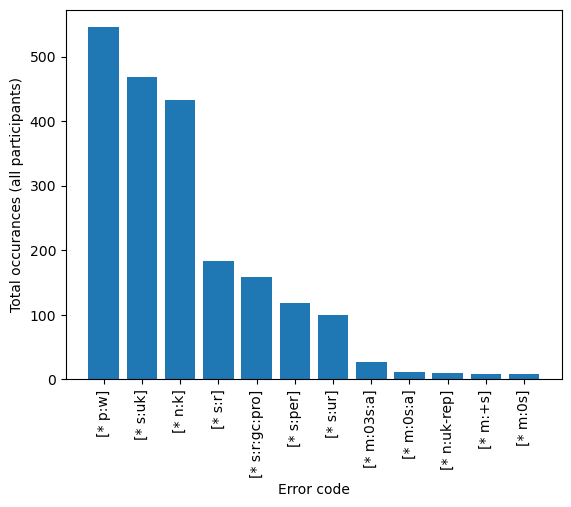

In [92]:
from matplotlib import pyplot as plt

plt.bar(*zip(*common.items()))
plt.xticks(rotation=90)
plt.ylabel("Total occurances (all participants)")
plt.xlabel("Error code")
plt.show()

In [61]:
# morphological errors for verb form changing
for key, value in sorted_freq.items():
    if '[* m:' in key:
        print(key, value)

[* m:03s:a] 27.0
[* m:0s:a] 11.0
[* m:+s] 9.0
[* m:0s] 9.0
[* m:+s:a] 7.0
[* m:vsg:a] 6.0
[* m:vun:a] 5.0
[* m:=s] 4.0
[* m:=ed] 3.0
[* m:+3s] 2.0
[* m:base:ed] 2.0
[* m:base:s:a] 2.0
[* m:+3s:a] 1.0
[* m:03s] 1.0
[* m:0ed] 1.0
[* m:=en] 1.0
[* m:a] 1.0
[* m:base:s] 1.0
[* m:irr:ed] 1.0
[* m:irr:s:a] 1.0
[* m:sub:en] 1.0


### Find out what words were substituted for p:w errors

In [62]:
# phonological errors
# only looking at p:w
for key, value in sorted_freq.items():
    if '[* p:' in key:
        print(key, value)

[* p:n] 947.0
[* p:w] 545.0
[* p:m] 3.0
[* p:n-ret] 2.0
[* p:n-per] 1.0
[* p:n-rep] 1.0


In [63]:
ipa = ['æ', 'é', 'ð', 'ü', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɚ', 'ɛ', 'ɜ', 'ɝ', 'ɡ', 'ɪ', 'ɹ', 'ɾ',
       'ʃ', 'ʊ', 'ʒ', 'ʔ', 'ʤ', 'ʧ', 'ː', '˞', '͡', 'θ', 'ʌ']
import re 
corrects = []
wrongs = []
# maybe work with Levenshtein distance? 
with open("../clan_outputs/word_error_info.cha", encoding="utf8") as file:
    for line in file:
        if '[* p:w]' in line:
            if not any(i in line for i in ipa): 
                    line = line.replace('(', ''). replace(')', '')
                    words = re.findall(r"(\w+)", line)
                    if words:
                        corrects.append(words[2])
                        wrongs.append(words[1])

In [64]:
print(len(corrects), len(wrongs))

422 422


In [65]:
import spacy
nlp = spacy.load("en_core_web_sm")
pos = []
for x in corrects:
    doc = nlp(x)
    for tok in doc:
        pos.append(tok.pos_)

In [66]:
len(pos)

422

In [67]:
# possible places where p:w errors happen
# most commonly in nouns, verbs, adverbs and pronouns
import pandas as pd
pd.Series(pos).value_counts()

NOUN     139
VERB     107
ADV       40
PRON      39
INTJ      32
NUM       15
ADJ       15
PROPN     14
AUX        7
ADP        6
CCONJ      3
PART       2
X          1
PUNCT      1
SCONJ      1
Name: count, dtype: int64

### Levenshtein distance approach to p:w errors is NP-hard so not useful to implement